# 선형회귀
선형회귀(Linear Regression)는 독립 변수와 종속 변수 사이의 선형 관계를 모델링하는 대표적인 통계적/머신러닝 기법입니다.

## 최소제곱법
최소제곱법(Ordinary Least Squares, OLS)은 주어진 데이터 포인트들에 대해, 선형 회귀 모델의 잔차(실제값과 예측값의 차이)의 제곱합을 최소화하는 방식으로 모델 파라미터(기울기와 절편)를 추정하는 방법입니다.

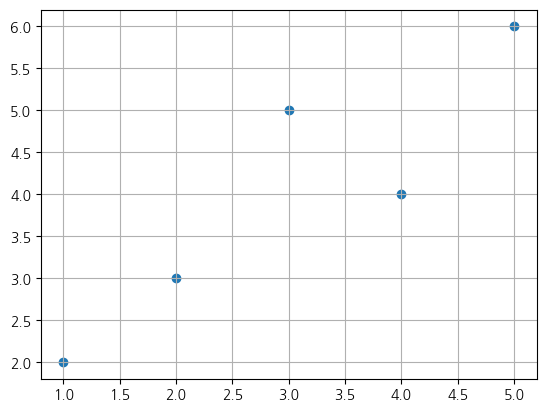

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# x: 독립 변수, y: 종속 변수
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

plt.scatter(x, y)
plt.grid()
plt.show()

In [74]:
mean_x = x.mean()
mean_y = y.mean()
mean_x, mean_y

(3.0, 4.0)

In [75]:
# 최소제곱법(공식)으로 기울기, 절편 구하기  
A = sum((x - mean_x) * (y - mean_y))
B = sum((x - mean_x) ** 2) 
slope = A / B
slope

0.9

In [76]:
intercept = mean_y - slope * mean_x
intercept

1.2999999999999998

In [77]:
pred = slope * x + intercept
pred

array([2.2, 3.1, 4. , 4.9, 5.8])

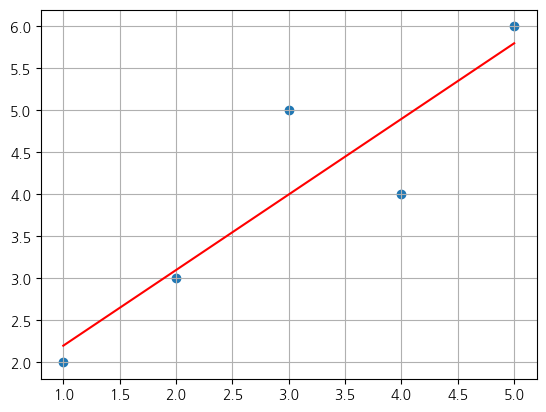

In [78]:
import koreanize_matplotlib

plt.scatter(x, y)
plt.plot(x, pred, color = 'red')
plt.grid()
plt.show()

In [79]:
slope * 2.5 + intercept

3.55

In [80]:
# R-squared value : 예측선이 데이터를 얼마만큼 설명하고 있는가?

y, pred # 실제값, 예측값

# 잔차 제곱합: y값들이 회귀선으로부터 얼마나 떨어져 있는가?
SSE = sum((y - pred) ** 2)
SSE

1.9000000000000004

In [81]:
# y값들이 평균에서 얼마나 떨어져 있는가?
SST = sum((y - mean_y) ** 2)
SST

10.0

In [82]:
# 0~1 : 예측값이 실제값을 81% 정도 설명한다.
R_squared = 1 - SSE / SST
R_squared

0.8099999999999999

선형회귀의 주요 가정은 다음과 같습니다.
* 선형성(Linearity): 독립 변수와 종속 변수 사이의 관계가 선형이다.
* 독립성(Independence): 오차항들이 서로 독립적이다.
* 등분산성(Homoscedasticity): 오차의 분산이 일정하다.
* 정규성(Normality): 오차항이 정규분포를 따른다.

In [83]:
import pandas as pd

data = {
    '키': [150, 160, 170, 175, 165, 155, 172, 168, 174, 158,
          162, 173, 156, 159, 167, 163, 171, 169, 176, 161],
    '몸무게': [42, 50, 70, 64, 56, 48, 68, 60, 65, 52,
            54, 67, 49, 51, 58, 55, 69, 61, 66, 53]
}

df = pd.DataFrame(data)
df.head()

,키,몸무게
0,150,42
1,160,50
2,170,70
3,175,64
4,165,56


In [84]:
from statsmodels.formula.api import ols

model = ols("키 ~ 몸무게", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      키   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.0
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           4.04e-10
Time:                        13:18:06   Log-Likelihood:                -45.761
No. Observations:                  20   AIC:                             95.52
Df Residuals:                      18   BIC:                             97.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0676      4.158     27.671      0.0

In [85]:
model.rsquared

0.8915914350087262

In [86]:
model.params['몸무게'], model.params['Intercept']

(0.8658438852380215, 115.0676390447185)

In [87]:
# 회귀계수가 통계적으로 유의미한지.
model.pvalues

Intercept    3.335096e-16
몸무게          4.037933e-10
dtype: float64

In [88]:
new_df = pd.DataFrame({"몸무게" : [67, 80]})
model.predict(new_df) # 회귀식에 독립변수값 넣어서 나온 종속변수 예측값

0    173.079179
1    184.335150
dtype: float64

In [89]:
# 몸무게 1단위 증가할때마다 키 95% 신뢰구간으로 0.7 ~ 1정도 증가한다.
model.conf_int(alpha = 0.05)

,0,1
Intercept,106.330992,123.804286
몸무게,0.716337,1.015351


## 연습문제
아래와 같이 35명의 학생에 대해 학습시간(study_hours), 출석률(attendance), 그리고 시험 성적(score) 데이터를 생성했다고 가정하자.
이 데이터를 활용하여 학습시간과 출석률이 성적에 미치는 영향을 분석하라.

* statsmodels의 ols를 이용해 회귀 모델을 적합한다.
* 회귀 결과 요약(회귀 계수, p-value, R-squared 등)을 해석한다.
* 결과를 시각화하여 독립 변수와 종속 변수 간의 관계를 확인한다.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("../Data/Student_Score.csv")

In [107]:
model = ols("score ~ study_hours + attendance", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     58.95
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.86e-11
Time:                        13:19:24   Log-Likelihood:                -107.11
No. Observations:                  35   AIC:                             220.2
Df Residuals:                      32   BIC:                             224.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9161     11.942      0.663      

In [108]:
model.rsquared
# 회귀선이 데이터의 78%정도를 설명 

0.7865232554554334

In [109]:
model.pvalues
# 학습시간, 출석률 둘다 유의함

Intercept      5.121693e-01
study_hours    3.043422e-12
attendance     2.298275e-03
dtype: float64

In [110]:
model.conf_int()
# 공부시간, 태도 한단위 증가할때마다 4.24~6.21, 0.16~0.68 정도 증가

,0,1
Intercept,-16.409812,32.242031
study_hours,4.247725,6.213616
attendance,0.163171,0.684072


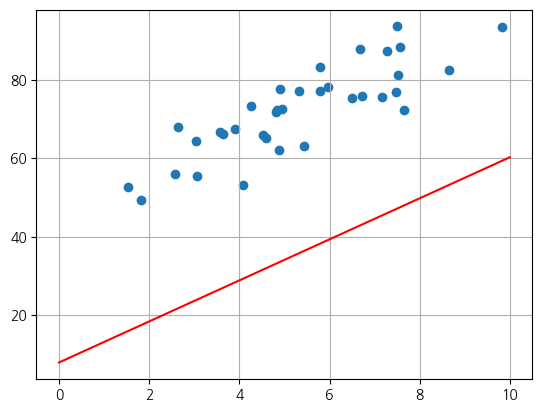

In [111]:
pred = model.params['study_hours'] * np.arange(11) + model.params['Intercept']

plt.scatter(df['study_hours'], df['score'])
plt.plot(np.arange(11), pred, color = 'red')
plt.grid()
plt.show()